In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer

### Le Clustering

In [2]:
df_data = data = pd.read_csv('rfm_df0.csv')
data 

,CustomerID,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
2,0000f46a3911fa3c0805444483337064,541,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89
...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,451,2,2067.42
93392,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58
93393,ffff371b4d645b6ecea244b27531430a,572,1,112.46
93394,ffff5962728ec6157033ef9805bacc48,123,1,133.69


In [3]:
data.describe()

,Recency,Frequency,Monetary
count,93396.000000,93396.000000,93396.000000
mean,241.744250,1.237837,174.134824
std,153.164721,0.847540,263.116852
min,0.000000,1.000000,10.070000
25%,118.000000,1.000000,64.000000
50%,222.000000,1.000000,110.440000
75%,351.000000,1.000000,189.000000
max,728.000000,75.000000,13664.080000


In [45]:
data0 =df_data=data.sample(frac=0.35)
data0.shape

(32689, 4)

In [46]:
my_data = data0
X = my_data.drop('CustomerID', axis = 1)

### Normalisation des données

In [47]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler().fit(X)
ada_scaled = scale.transform(X)


In [48]:
df = pd.DataFrame(ada_scaled)
df.columns = ['Recency','Frequency','Monetary']


## Modelisation avec KMeans

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

### Recherche de coefficent de silhouette 

In [9]:
silhou = []
for i in range (2, 12): 
 # initialisation de kmeans
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(ada_scaled)
    cluster_labels = kmeans.labels_
    silhou.append(silhouette_score(ada_scaled, cluster_labels))    

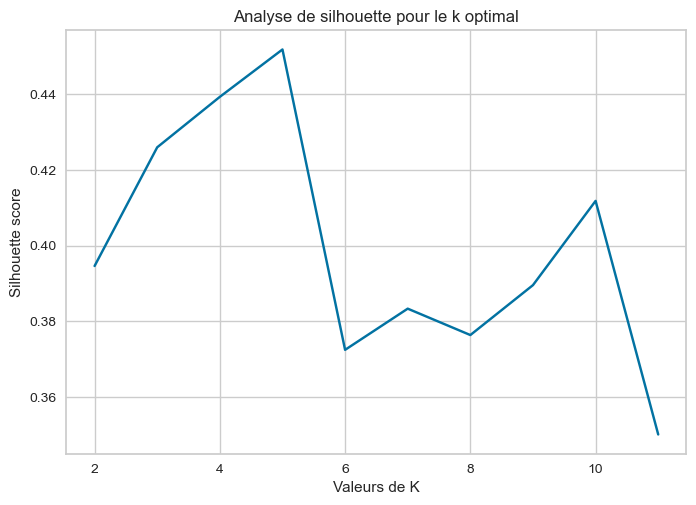

In [13]:
plt.plot(range(2, 12), silhou,'bx-')
plt.xlabel('Valeurs de K') 
plt.ylabel('Silhouette score') 
plt.title('Analyse de silhouette pour le k optimal')
plt.show()

### La methode de coude ou distorsion 

In [20]:
inerti = []
for i in range (2, 12):
    mKmean = KMeans(n_clusters=i, random_state=42)
    mKmean.fit(ada_scaled)
    inerti.append(mKmean.inertia_)

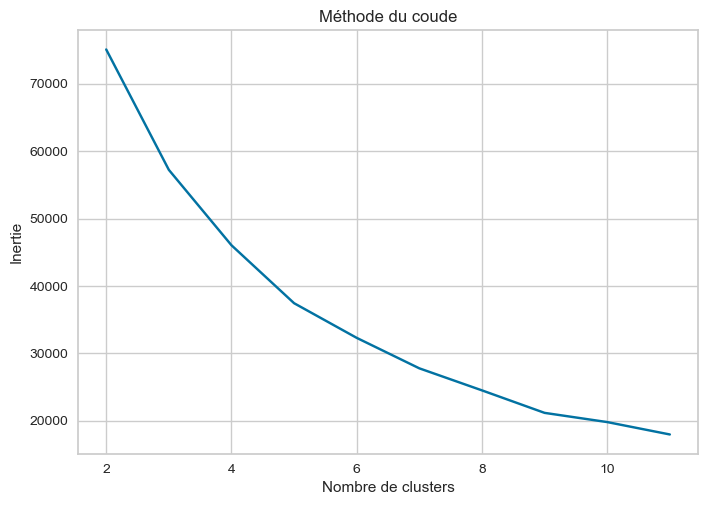

In [21]:
plt.plot(range(2, 12), inerti)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()


In [22]:
from yellowbrick.cluster import SilhouetteVisualizer

### Graphique de distorsion avec  k = 5

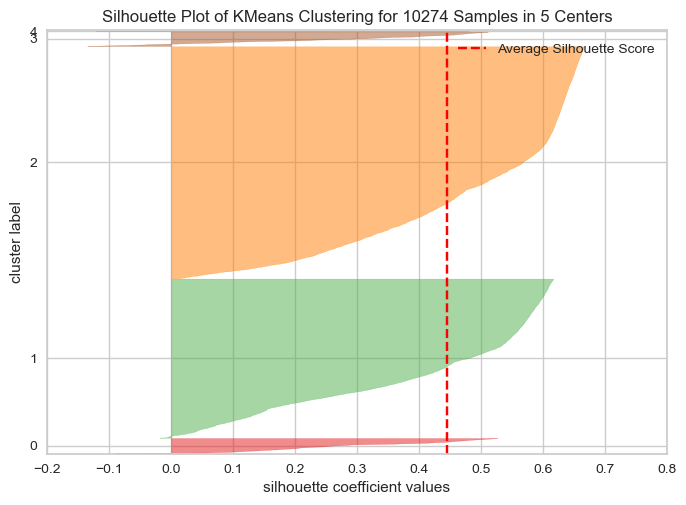

In [16]:
model = SilhouetteVisualizer(KMeans(5))
model.fit(ada_scaled)
model.show();

###  Graphique de distorsion avec  k = 4 

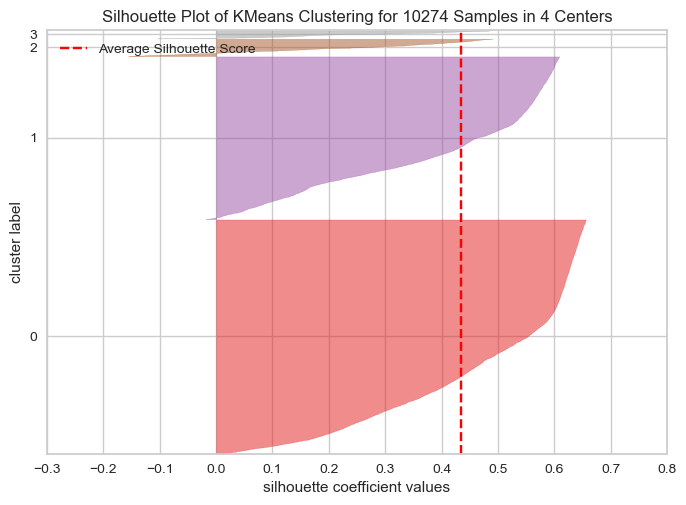

In [17]:
model = SilhouetteVisualizer(KMeans(4))
model.fit(ada_scaled)
model.show();

### modelisation de Kmeans avec k = 4

In [14]:
modelKmean = KMeans(n_clusters=4, random_state=42)
modelKmean.fit(ada_scaled)

KMeans(n_clusters=4, random_state=42)

In [15]:
modelKmean.labels_

array([2, 0, 0, ..., 2, 2, 1])

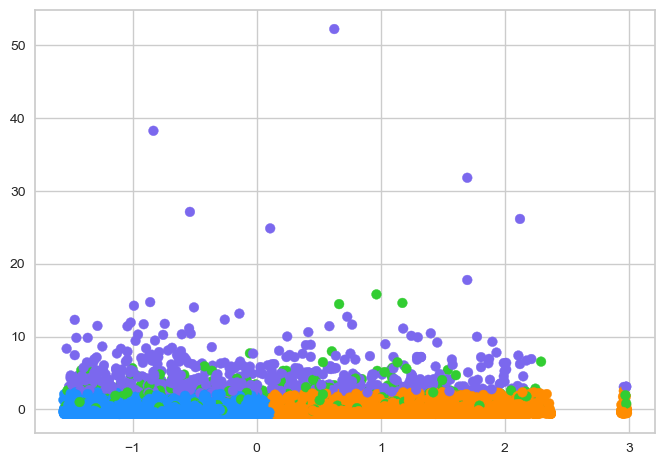

In [16]:
colorL = np.array(['#1E90FF','#32CD32','#FF8C00','#7B68EE'])
plt.scatter(ada_scaled[:,0], ada_scaled[:,2], c=colorL[modelKmean.labels_]);

In [50]:
df_data['ClusterKmean'] = modelKmean.labels_
df_data

,CustomerID,Recency,Frequency,Monetary,ClusterKmean
23862,4131dcbf66c415fb6efa9f4878749bd2,76,1,223.76,2
85063,e8e2449fa453dd320f605734798bb093,249,1,133.35,0
46146,7e16dc849b8d954febd4c2ab9a1b1c60,44,1,85.81,0
15762,2b159d0cdf66c3325b64304c18ae2e75,140,1,79.19,0
46568,7f50c43baa66aae590aa1a067427cce5,130,3,171.04,2
...,...,...,...,...,...
3176,0894788109c194395b72fff93502ba6e,46,1,89.82,0
57334,9cddd5e19cf32df589743ca041498b8f,56,1,138.50,0
93042,ff0e4a6f3114ad1d211b885159bf1eb2,519,1,1672.67,2
15136,296b245d6ab112891351396869ada4d6,370,1,199.52,2


In [51]:
NbrCli_Label = df_data.groupby('ClusterKmean')['Monetary'].count().reset_index()
NbrCli_Label.columns = ['ClusterKmean','Total']
NbrCli_Label

,ClusterKmean,Total
0,0,17553
1,1,1201
2,2,13261
3,3,674


In [52]:
df_data["TypeClient"] = np.where(df_data['ClusterKmean'] == 0, "Client Ordinaire",(np.where(df_data['ClusterKmean'] == 1,
                        "ClientMoyen",(np.where(df_data['ClusterKmean'] == 2,"Très bon Client","Excellent Client")))))
df_data[['CustomerID', 'ClusterKmean', 'TypeClient']].head(5)

,CustomerID,ClusterKmean,TypeClient
23862,4131dcbf66c415fb6efa9f4878749bd2,2,Très bon Client
85063,e8e2449fa453dd320f605734798bb093,0,Client Ordinaire
46146,7e16dc849b8d954febd4c2ab9a1b1c60,0,Client Ordinaire
15762,2b159d0cdf66c3325b64304c18ae2e75,0,Client Ordinaire
46568,7f50c43baa66aae590aa1a067427cce5,2,Très bon Client


In [53]:
df_data

,CustomerID,Recency,Frequency,Monetary,ClusterKmean,TypeClient
23862,4131dcbf66c415fb6efa9f4878749bd2,76,1,223.76,2,Très bon Client
85063,e8e2449fa453dd320f605734798bb093,249,1,133.35,0,Client Ordinaire
46146,7e16dc849b8d954febd4c2ab9a1b1c60,44,1,85.81,0,Client Ordinaire
15762,2b159d0cdf66c3325b64304c18ae2e75,140,1,79.19,0,Client Ordinaire
46568,7f50c43baa66aae590aa1a067427cce5,130,3,171.04,2,Très bon Client
...,...,...,...,...,...,...
3176,0894788109c194395b72fff93502ba6e,46,1,89.82,0,Client Ordinaire
57334,9cddd5e19cf32df589743ca041498b8f,56,1,138.50,0,Client Ordinaire
93042,ff0e4a6f3114ad1d211b885159bf1eb2,519,1,1672.67,2,Très bon Client
15136,296b245d6ab112891351396869ada4d6,370,1,199.52,2,Très bon Client


In [54]:
df_op = df_data.drop(['CustomerID','TypeClient'],axis = 1)
df_op 

,Recency,Frequency,Monetary,ClusterKmean
23862,76,1,223.76,2
85063,249,1,133.35,0
46146,44,1,85.81,0
15762,140,1,79.19,0
46568,130,3,171.04,2
...,...,...,...,...
3176,46,1,89.82,0
57334,56,1,138.50,0
93042,519,1,1672.67,2
15136,370,1,199.52,2


In [40]:
df_op

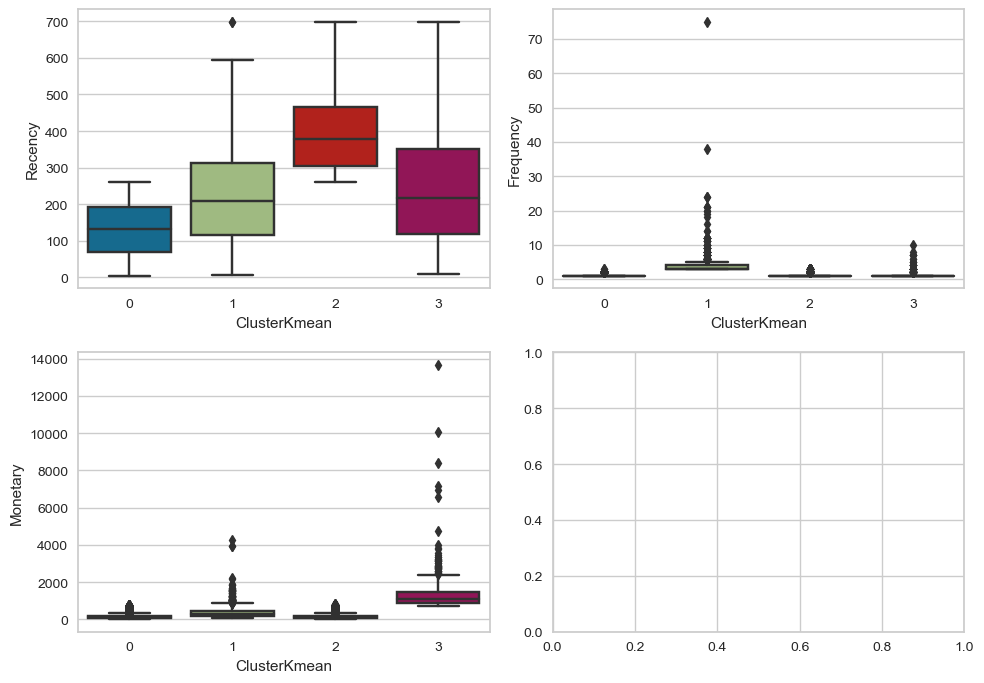

In [22]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(10,7))
row = 0
col = 0
for i in range(len(df_op.columns)-1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x =df_op['ClusterKmean'], y =df_op[df_op.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
plt.show()

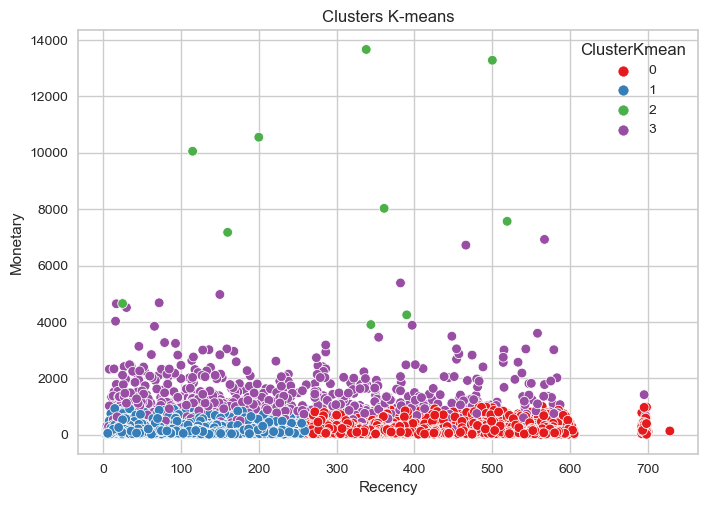

In [37]:
sns.scatterplot(data=df_data, x='Recency', y='Monetary', hue='ClusterKmean', palette='Set1')
plt.title("Clusters K-means")
plt.show()

## Modelisation avec DBSCAN

In [39]:
from sklearn.cluster import DBSCAN

### Preparation des données avec 2 featues dont review score

In [40]:
df_scan0 = pd.read_csv('df_m0.csv')
df_scan0

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,total_order_price,average_price_per_item
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,146.87,146.870
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,137.89,137.890
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,137.89,68.945
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,140.61,140.610
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,137.58,137.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,0fbd856ba1d4961786fb54bd448eb7fe,96328ac15f58fbb232fe14b182103382,89675,vargem bonita,SC,937592924b66482b823ee7ecd185d0ff,delivered,2018-03-31 19:17:43,2018-03-31 19:55:18,2018-04-02 19:10:46,...,59.0,284.0,2.0,12500.0,83.0,21.0,43.0,la_cuisine,426.70,426.700
115605,98a1b4f80dd0ccb7d1ae5a75ba5c904e,bf5ed75fca98e8f79c49e9a5bf7690e1,13480,limeira,SP,28915ae2a90c218f0c2b7f8e0fb280e0,delivered,2017-04-09 20:04:37,2017-04-11 03:45:26,2017-04-12 07:03:58,...,41.0,194.0,1.0,450.0,31.0,10.0,18.0,la_cuisine,34.81,17.405
115606,aa0533eb31ed3be79086f11bb2bec430,a490d5875edefe9bb8f5101ec2f6b56f,13870,sao joao da boa vista,SP,e22a3e8048469ea68906f666d446c25c,delivered,2017-08-28 09:48:01,2017-08-28 10:05:04,2017-08-29 11:05:28,...,59.0,731.0,1.0,2200.0,84.0,12.0,15.0,la_cuisine,160.46,160.460
115607,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1ce0acf125f1bcd636276dd213363196,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,...,57.0,429.0,1.0,2700.0,85.0,7.0,40.0,la_cuisine,155.18,155.180


In [41]:
df_0 = df_scan0.sample(frac=0.3)
df_0.shape

(34683, 40)

In [42]:
df_0 = df_0[['review_score','payment_value']]
df_0

,review_score,payment_value
18485,3,5.05
44424,1,588.66
81261,5,94.22
93187,5,37.72
4202,5,92.30
...,...,...
27418,1,174.86
16605,3,242.12
105104,5,45.10
79527,5,36.10


In [43]:
scale_scan = preprocessing.StandardScaler().fit(df_0)
scaled_scan = scale_scan.transform(df_0)

In [44]:
scaled_scan

array([[-0.75085372, -0.62269322],
       [-2.19774426,  1.53690248],
       [ 0.69603683, -0.29272775],
       ...,
       [ 0.69603683, -0.47449184],
       [ 0.69603683, -0.50779552],
       [ 0.69603683, -0.09993644]])

In [45]:
dbscan = DBSCAN(eps=0.5, min_samples=100)
# Adapter le modèle aux données.
dbscan.fit(scaled_scan)
# Les étiquettes de cluster sont disponibles dans l'attribut 'labels_'.
cluster_labels1 = dbscan.labels_

In [46]:
df_0['Cluster'] = cluster_labels1
df_0

,review_score,payment_value,Cluster
18485,3,5.05,0
44424,1,588.66,1
81261,5,94.22,2
93187,5,37.72,2
4202,5,92.30,2
...,...,...,...
27418,1,174.86,1
16605,3,242.12,0
105104,5,45.10,2
79527,5,36.10,2


### Nombre de cluster obtenu : 

In [47]:
nb_clus = df_0.groupby('Cluster').count()
nb_clus

,review_score,payment_value
Cluster,,
-1,506,506
0,2791,2791
1,4229,4229
2,19443,19443
3,6574,6574
4,1140,1140


In [48]:
cluster_stats = df_0.groupby('Cluster').mean()
cluster_stats

,review_score,payment_value
Cluster,,
-1,3.266798,1639.171443
0,3.000000,141.601992
1,1.000000,187.105789
2,5.000000,147.953782
3,4.000000,145.159004
4,2.000000,144.432140


##  Modelisation avec Classification ascendante hiérarchique (CAH)

Cette méthode est dite **"ascendante"** car elle construit une hiérarchie de regroupements à partir de la **fusion successive des individus ou des groupes les plus similaires**.

La construction de la CAH implique les étapes suivantes :

- **Étape 1 :** Définir la mesure de similarité ou dissimilarité appropriée pour les données (distance euclienne, Manhattan, corrélation etc.)
- **Étape 2 :** Calculer la matrice de similarité ou dissimilarité entre les individus ou groupes.
- **Étape 3 :** Initialiser chaque individu ou groupe comme un cluster isolé.
- **Étape 4 :** Calculer les similarités ou dissimilarités entre tous les clusters.
- **Étape 5 :** Fusionner les deux clusters les plus similaires (ou les moins dissimilaires) pour former un nouveau cluster.
- **Étape 6 :** Mettre à jour la matrice de similarité ou dissimilarité en tenant compte du nouveau cluster formé.
- **Étape 7 :** Répéter les étapes 4 à 6 jusqu'à ce que tous les individus soient regroupés en un seul cluster.
- **Étape 8 :** Visualiser les résultats à l'aide d'un dendrogramme pour interpréter la structure des regroupements.



In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples


In [50]:
ada_scaled

array([[-0.72167401, -0.26923636,  0.09419311],
       [ 0.40184276, -0.26923636, -0.21774274],
       [ 0.33652202,  0.85320559,  0.17976375],
       ...,
       [-0.59103253, -0.26923636, -0.45451757],
       [-1.19851543,  0.85320559,  0.12019953],
       [-0.34934578, -0.26923636, -0.47307846]])

## Construction du dendogramme 
**Méthode du saut maximum** : Observez les distances verticales entre les fusions de clusters dans le dendrogramme. **Recherchez les sauts les plus importants** et identifiez le niveau de similarité/dissimilarité correspondant. Le nombre de clusters peut être déterminé par le nombre de sauts significatifs dans le dendrogramme.

In [51]:
#Ward : Cette méthode minimise la somme des carrés des écarts au sein des clusters.
link = linkage(ada_scaled, method="ward", metric='euclidean')

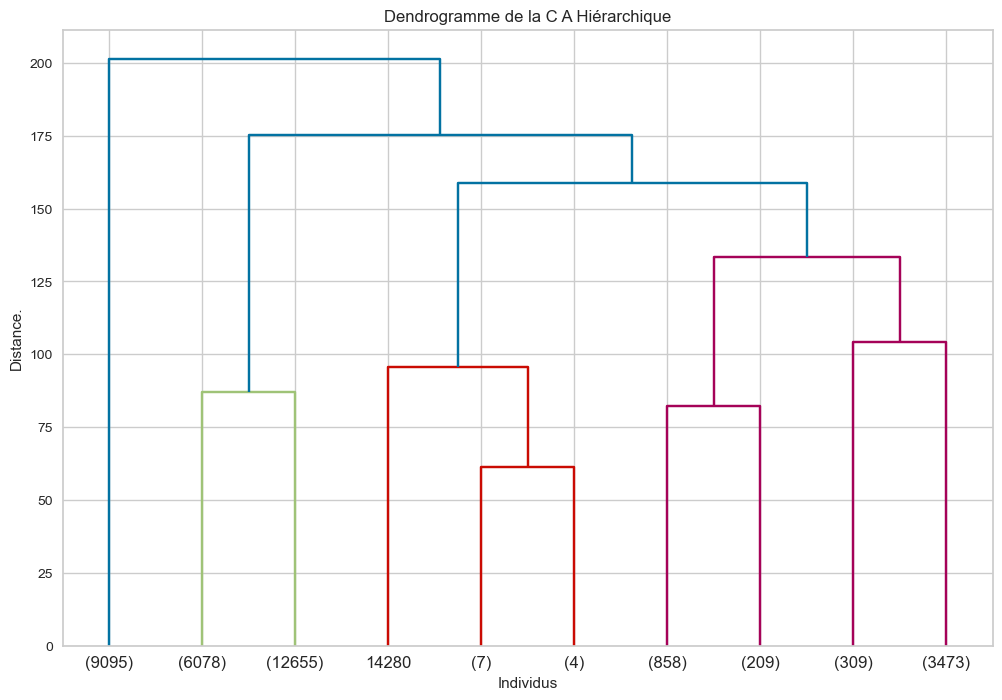

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(link, p=10, truncate_mode="lastp", ax=ax)

plt.title("Dendrogramme de la C A Hiérarchique")
plt.xlabel("Individus")
plt.ylabel("Distance.")
plt.show();

In [ ]:
# Effectuer la CAH avec différentes coupes du dendrogramme
max_clusters = 10  # Nombre maximal de clusters à considérer
silhouette_scores = []

for num_clusters in range(2, max_clusters+1):
    clusters = fcluster(linkage(ada_scaled, method='ward', metric='euclidean'), num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(ada_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

# Tracer le graphique du score de silhouette moyen pour chaque nombre de clusters
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title("Score de silhouette moyen pour chaque nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette moyen")
plt.show()

# Trouver le nombre optimal de clusters qui maximise le score de silhouette moyen
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # +2 car on commence à 2 clusters
print("Nombre optimal de clusters :", optimal_num_clusters)

In [44]:
num_clusters = 2
# Effectuer la CAH avec le nombre de clusters choisi
clusters = fcluster(link, num_clusters, criterion='maxclust')
# Ajouter les informations de cluster dans le DataFrame
df['Cluster'] = clusters

df

,Recency,Frequency,Monetary,Cluster
0,-0.463629,-0.299406,-0.046078,2
1,-0.306541,-0.299406,-0.418989,2
2,-1.288342,2.191364,0.352962,1
3,1.892694,-0.299406,0.149553,2
4,1.833786,-0.299406,-0.170225,2
...,...,...,...,...
10269,-0.149453,-0.299406,-0.109423,2
10270,-0.574900,-0.299406,-0.316939,2
10271,2.075964,-0.299406,-0.531142,2
10272,0.459264,2.191364,0.040126,1
